In [4]:
import time
import imageio
import operator
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from InstagramAPI import InstagramAPI
from matplotlib.ticker import FormatStrFormatter

In [5]:
imageio.plugins.ffmpeg.download()

username = "fafasonga06"
password = "Fafastar05"
InstagramAPI = InstagramAPI(username, password)
InstagramAPI.login()

Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}
Request return 404 error!
Login success!



True

In [6]:
InstagramAPI.getProfileData()
result = InstagramAPI.LastJson
username = result['user']['username']  

In [7]:
InstagramAPI.LastJson.keys()

dict_keys(['user', 'status'])

In [8]:
my_id = result['user']['pk']
InstagramAPI.getUsernameInfo(my_id)

True

In [9]:
InstagramAPI.timelineFeed()

True

In [37]:
myposts = []
max_id = ""
followers = []
has_more_posts = True
next_max_id = True

while has_more_posts:
    InstagramAPI.getSelfUserFeed(maxid=max_id)
    if InstagramAPI.LastJson['more_available'] is not True:
        has_more_posts = False  # stop condition
        print("Processing Finished")

    max_id = InstagramAPI.LastJson.get('next_max_id', '')
    myposts.extend(InstagramAPI.LastJson['items'])  # merge lists
    time.sleep(1)  # Slows the script down to avoid flooding the servers

datas = []
for k in myposts:
    likes_counts = k['like_count']
    datas.append(likes_counts)
    top_likers = k['top_likers']
#     print(top_likers)

Processing Finished


In [11]:
InstagramAPI.getRecentActivity()
get_recent_activity_response = InstagramAPI.LastJson

InstagramAPI.getProfileData()
user_id = InstagramAPI.LastJson['user']['pk']

InstagramAPI.getUserFollowings(user_id)
following_list = InstagramAPI.LastJson['users']
InstagramAPI.getUserFollowers(user_id)
followers_list = InstagramAPI.LastJson['users']

In [12]:
while next_max_id:
    #first iteration hack
    if next_max_id == True:
        next_max_id = ''
    _ = InstagramAPI.getUserFollowers(user_id, maxid=next_max_id)
    followers.extend(InstagramAPI.LastJson.get('users', []))
    next_max_id = InstagramAPI.LastJson.get('next_max_id', '')
    time.sleep(1)

In [13]:
followers_list = followers

user_list = map(lambda x: x['username'], following_list)
following_set = set(user_list)

user_list = map(lambda x: x['username'], followers_list)
followers_set = set(user_list)

not_following_back = following_set - followers_set
fans = followers_set - following_set

print("\nNumber of Followers: ", len(followers_set))
print("Number of Following: ", len(following_set))
print("Number of Not Following back: ", len(not_following_back))
print("Number of Fans: ", len(fans))
print("\nPeople that do not Follow me back: ", not_following_back)
# print("\nfollowing: ", following_set)


Number of Followers:  546
Number of Following:  54
Number of Not Following back:  3
Number of Fans:  495

People that do not Follow me back:  {'innopolisu', 'innopolismedia', 'innopolis'}


In [14]:
followerz = []
for follower in followers_set:
    followerz.append(follower)

In [15]:
followingz = []
for following in following_set:
    followingz.append(following)

In [16]:
fanz = []
for fann in fans:
    fanz.append(fann)

In [17]:
not_followingz = []
for not_following in not_following_back:
    not_followingz.append(not_following)

In [18]:
l1 = followerz
l2 = fanz
l3 = followingz
l4 = not_followingz

In [19]:
s1 = pd.Series(l1, name='Followers')
s2 = pd.Series(l2, name='Fans')
s3 = pd.Series(l3, name='Following')
s4 = pd.Series(l4, name='Not Following')

In [20]:
df = pd.concat([s1, s2, s3, s4], axis=1)
df.to_csv('insta_analysis.csv', sep=';', encoding='utf-8')

In [82]:
likerz = []
for g in myposts:
    likes_counts = np.array(g['like_count'])
    top_likers = np.array(g['top_likers'])
    for j in top_likers:
        likerz.append(j)

In [87]:
d = {x:likerz.count(x) for x in likerz}
x_axis, y_axis = d.keys(), d.values()

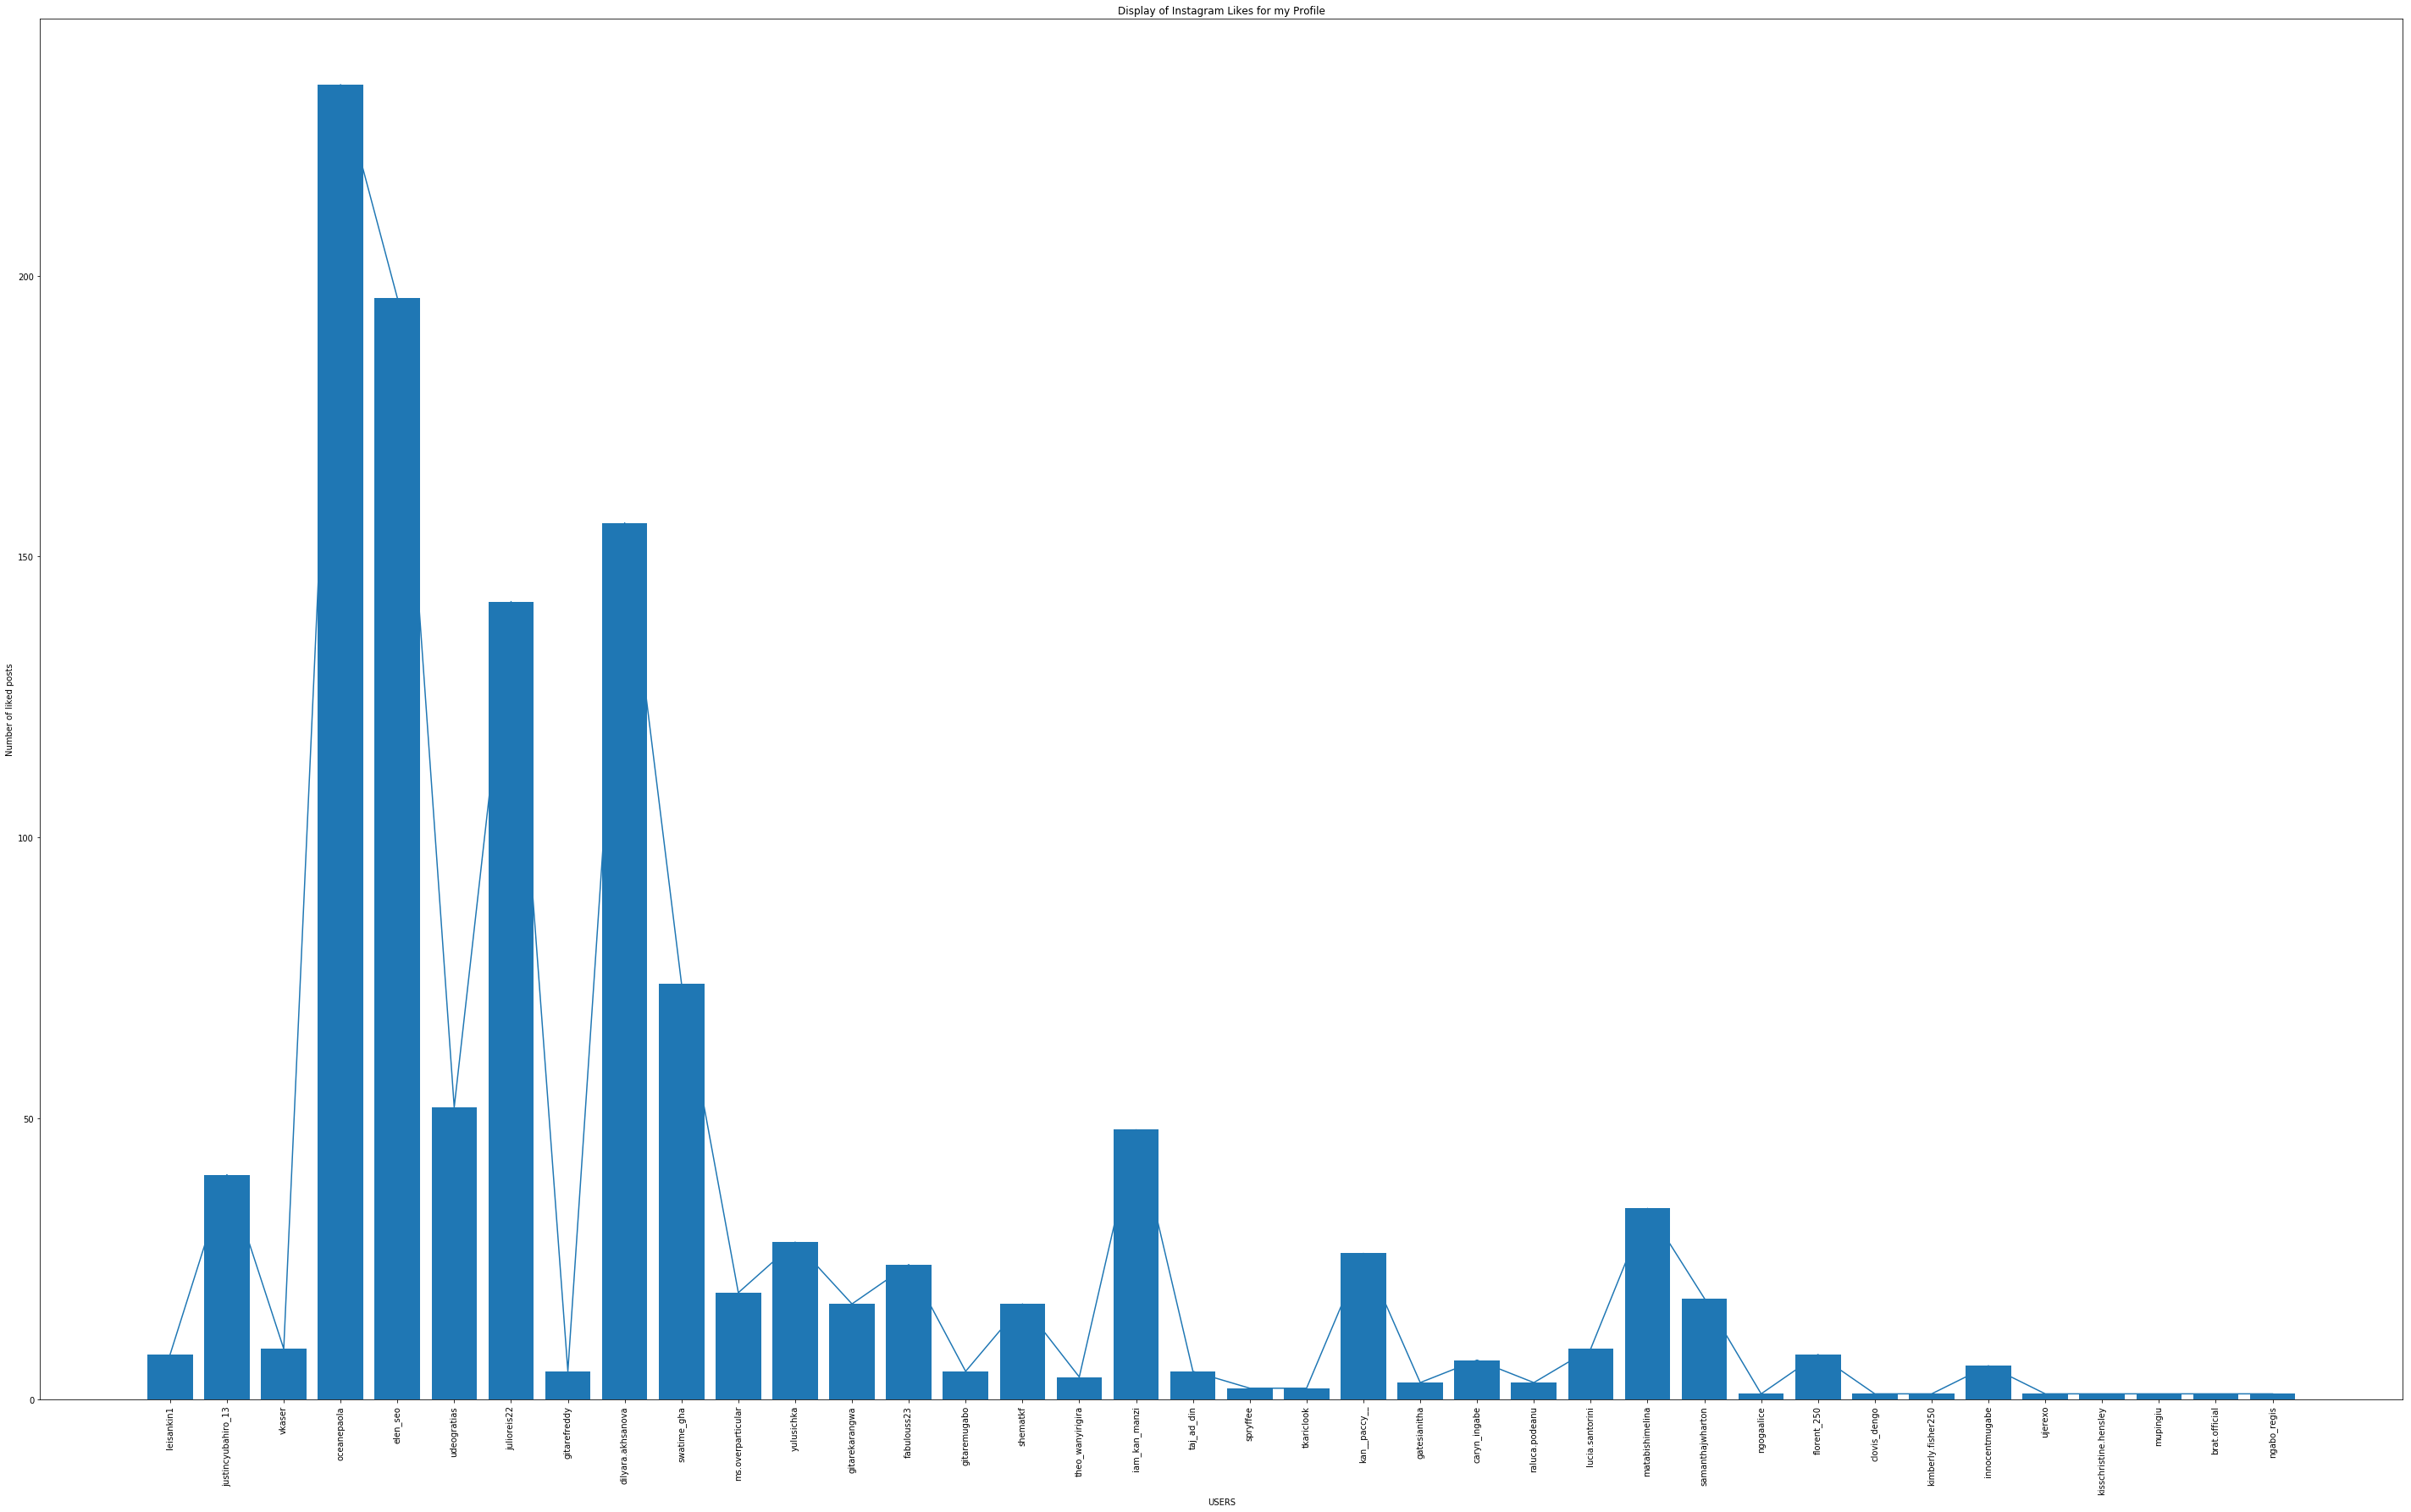

In [126]:
fig = plt.figure(figsize=(50,30))
plt.plot(x_axis, y_axis)
plt.bar(x_axis, y_axis)
plt.xticks(rotation='vertical')
plt.title('Display of Instagram Likes for my Profile')
plt.xlabel('USERS')
plt.ylabel('Number of liked posts')
fig.savefig("Insta_Analysis")
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

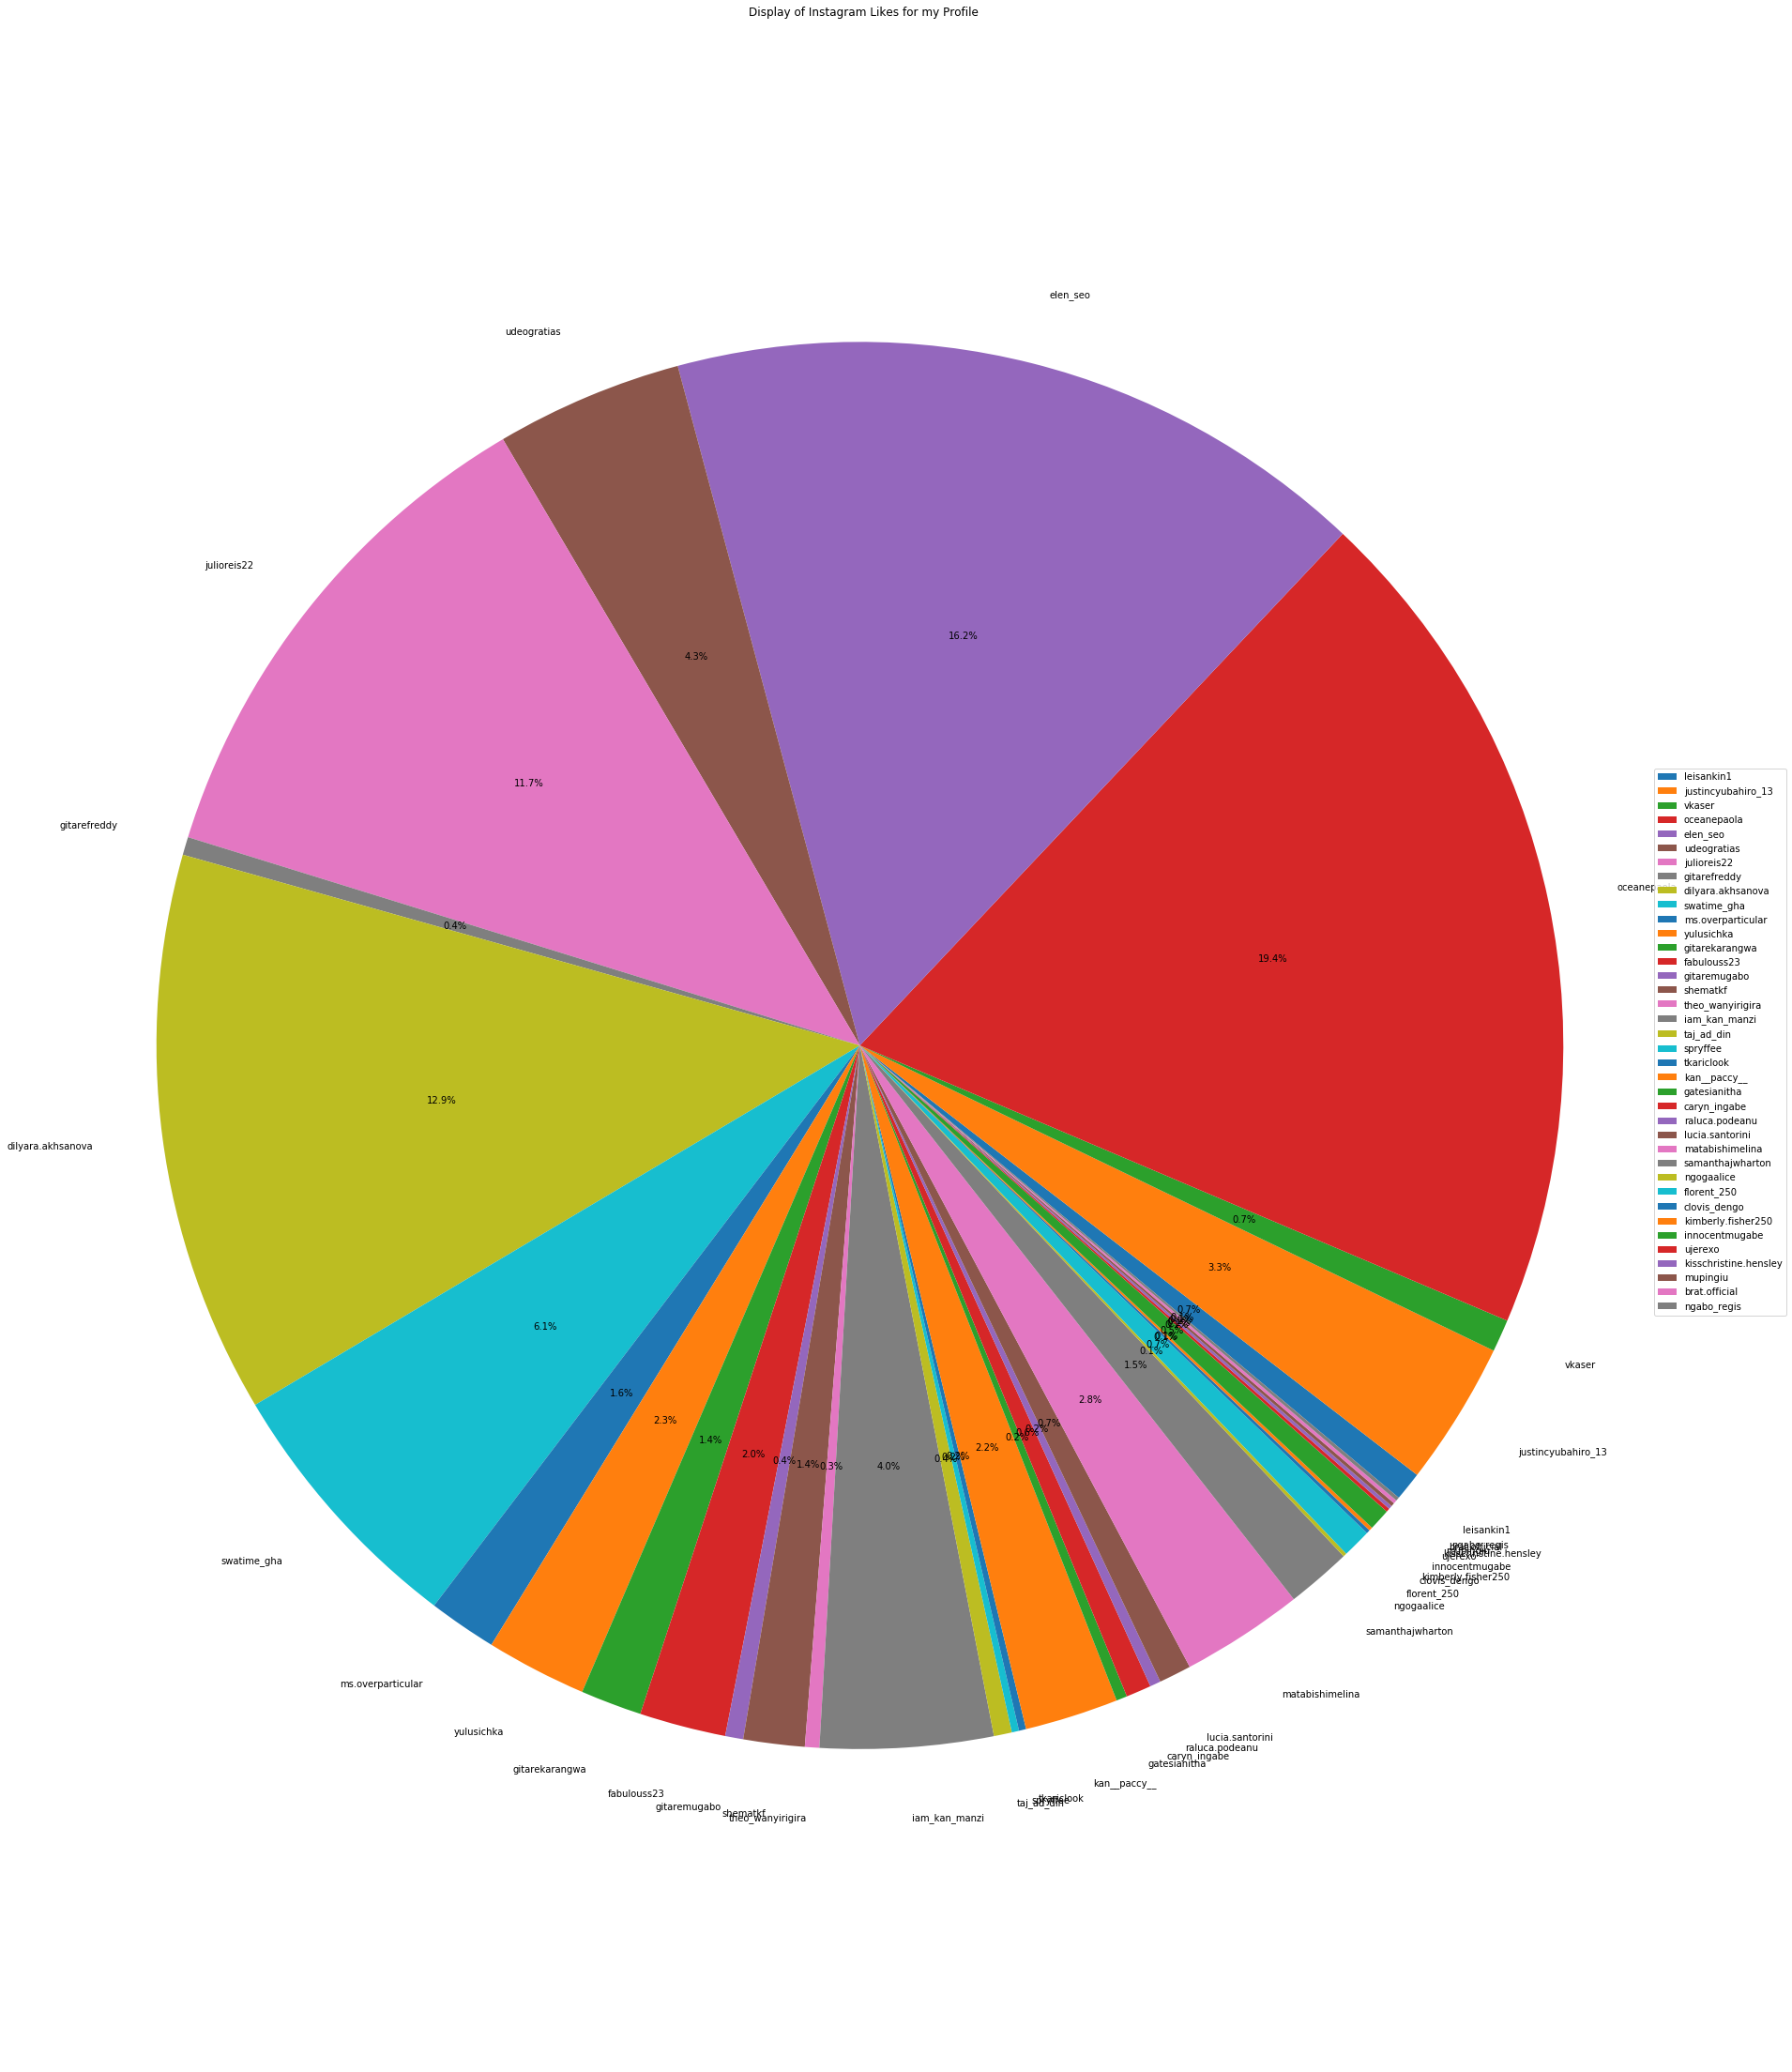

In [193]:
plt.gcf().clear()

fig1, ax1 = plt.subplots(figsize=(30,40))
ax1.pie(y_axis, labels=x_axis, autopct='%1.1f%%',
        shadow=False, startangle=-40)
ax1.axis('equal')  
ax1.set_xticklabels(x_axis, rotation=90)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_title("Display of Instagram Likes for my Profile")
fig1.savefig('Insta_analysispi.png', bbox_inches='tight')
plt.show()

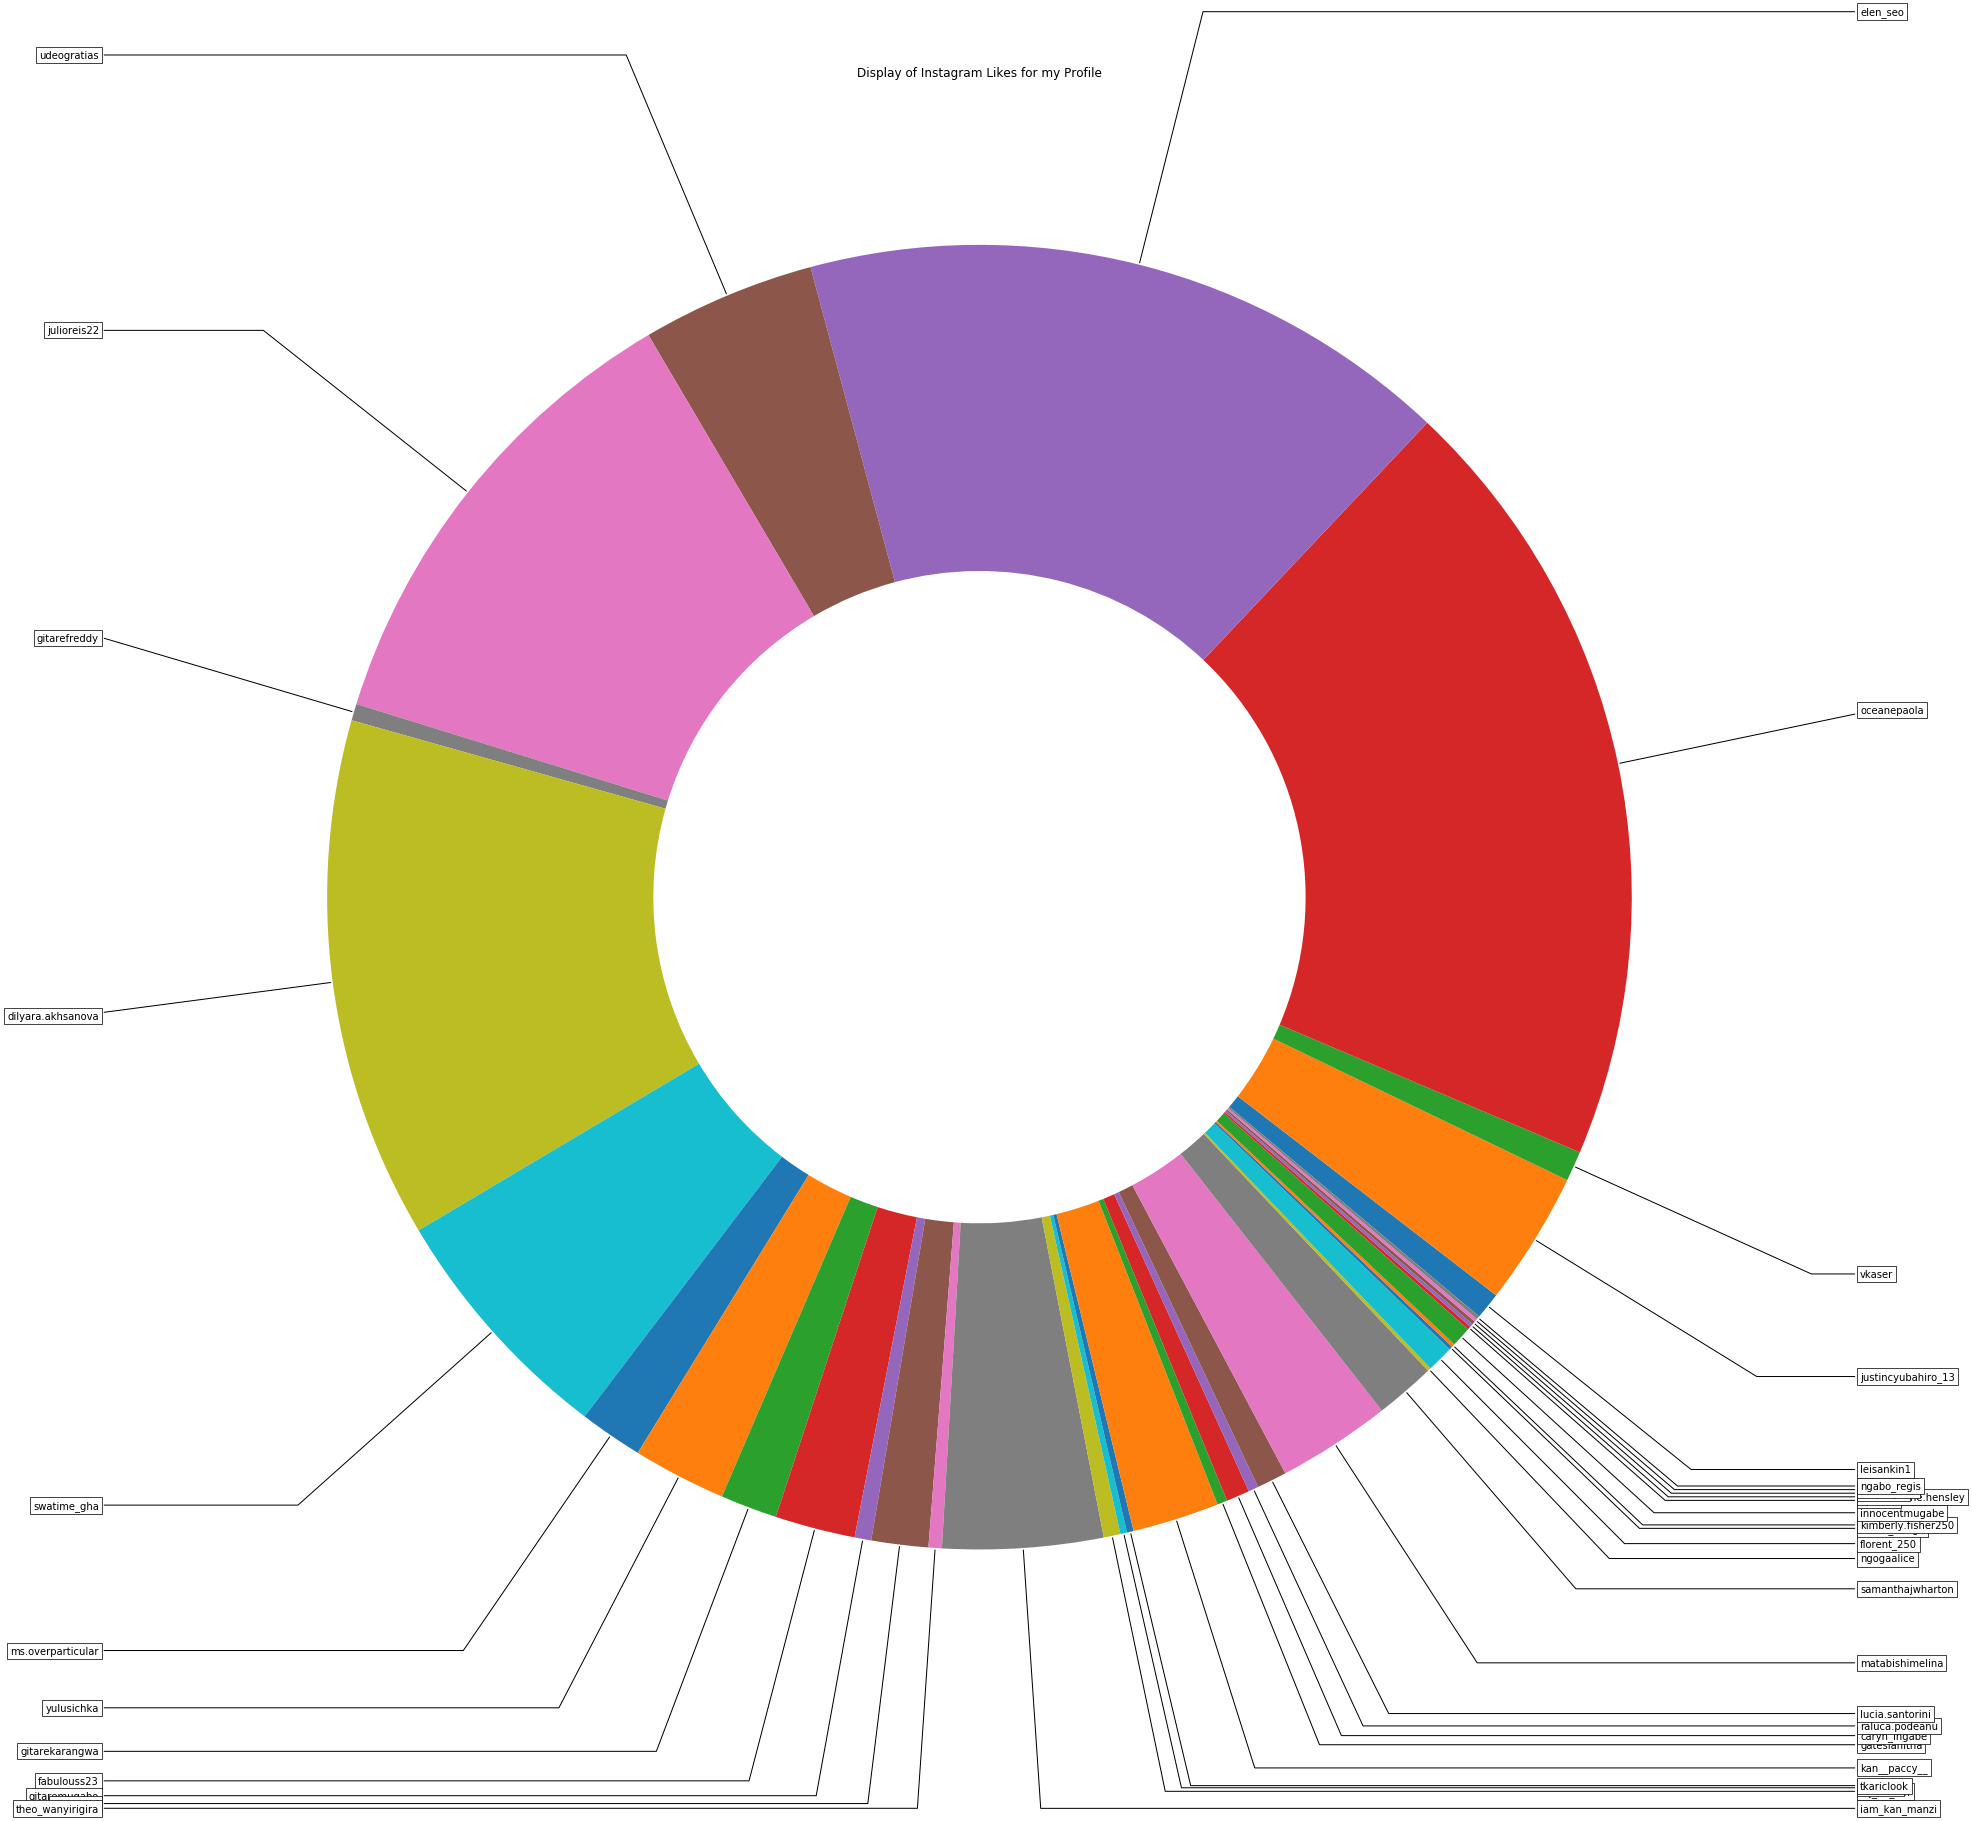

In [189]:
fig, ax = plt.subplots(figsize=(50,30), subplot_kw=dict(aspect="equal"))

recipe = list(x_axis)
data = y_axis

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
ax.set_title("Display of Instagram Likes for my Profile")
fig.savefig('Insta_analysispie.png', bbox_inches='tight')
plt.show()

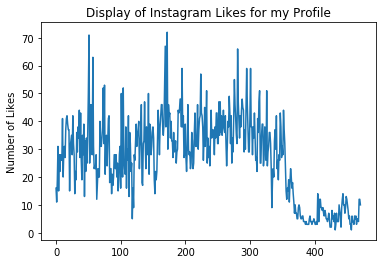

In [51]:
plt.plot(datas)
fig = plt.gcf()
plt.ylabel('Number of Likes')
plt.title('Display of Instagram Likes for my Profile')
fig.savefig("Counts_of_Likes")
plt.show()

In [62]:
valuee = []
for i in likerz:
    valuee.append(len(i))

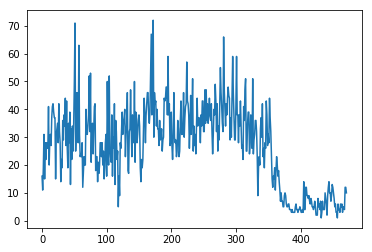

In [76]:
plt.plot(datas)
plt.autoscale(enable=True, axis=u'both', tight=False)
plt.show()

In [ ]:
# for text in texts:
#     textz = np.array(text['text'])
#     timez = np.array(text['created_at_utc'])
#     print((timez, textz))

In [1]:
import pandas as pd
from InstagramAPI import InstagramAPI
from pandas.io.json import json_normalize

Fail to import moviepy. Need only for Video upload.


In [11]:
def login_to_instagram(usname, passw):
    api = InstagramAPI(usname, passw)
    api.login()
    return api

In [3]:
def get_my_posts(api):
    '''Retrieve all posts from own profile'''
    my_posts = []
    has_more_posts = True
    max_id= ''

    while has_more_posts:
        api.getSelfUserFeed(maxid=max_id)
        if api.LastJson['more_available'] is not True:
            has_more_posts = False #stop condition

        max_id = api.LastJson.get('next_max_id','')
        my_posts.extend(api.LastJson['items']) #merge lists
        time.sleep(2) # slows down to avoid flooding

        if has_more_posts:
            print(str(len(my_posts)) + ' posts retrieved so far...')

    print('Total posts retrieved: ' + str(len(my_posts)))
    
    return my_posts

In [4]:
def get_posts_likers(api, my_posts):
    '''Retrieve all likers on all posts'''
    
    likers = []
    
    print('wait %.1f minutes' % (len(my_posts)*2/60.))
    for i in range(len(my_posts)):
        m_id = my_posts[i]['id']
        api.getMediaLikers(m_id)
        
        likers += [api.LastJson]
        
        # Include post_id in likers dict list
        likers[i]['post_id'] = m_id
        
        time.sleep(2)
    print('done')
    
    return likers

In [5]:
def get_posts_commenters(api, my_posts):
    '''Retrieve all commenters on all posts '''
    
    commenters = []
    
    print('wait %.1f minutes' % (len(my_posts)*2/60.))
    for i in range(len(my_posts)):
        m_id = my_posts[i]['id']
        api.getMediaComments(m_id)
        
        commenters += [api.LastJson]
        
        # Include post_id in commenters dict list
        commenters[i]['post_id'] = m_id
            
        time.sleep(2)
    print('done')
    
    return commenters

In [6]:
def posts_likers_to_df(likers):
    '''Transforms likers list of dicts into pandas DataFrame'''
    
    # Normalize likers by getting the 'users' list and the post_id of each like
    df_likers = json_normalize(likers, 'users', ['post_id'])
    
    # Add 'content_type' column to know the rows are likes
    df_likers['content_type'] = 'like'
    
    return df_likers

In [7]:
def posts_commenters_to_df(commenters):
    '''Transforms commenters list of dicts into pandas DataFrame'''
    
    # Include username and full_name of commenter in 'comments' list of dicts
    for i in range(len(commenters)):
        if len(commenters[i]['comments']) > 0: # checks if there is any comment on the post
            for j in range(len(commenters[i]['comments'])):
                # Puts username/full_name one level up
                commenters[i]['comments'][j]['username'] = commenters[i]['comments'][j]['user']['username']
                commenters[i]['comments'][j]['full_name'] = commenters[i]['comments'][j]['user']['full_name']
                
    # Create DataFrame
    # Normalize commenters to have 1 row per comment, and gets 'post_id' from parent 
    df_commenters = json_normalize(commenters, 'comments', 'post_id')
    
    # Get rid of 'user' column as we already handled it above
    del df_commenters['user']
    
    return df_commenters

In [13]:
username = "fafasonga06"
password = "Fafastar05"
api = login_to_instagram(username, password)

Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}
Request return 404 error!
Login success!



In [199]:
my_posts = get_my_posts(api)

18 posts retrieved so far...
36 posts retrieved so far...
54 posts retrieved so far...
72 posts retrieved so far...
90 posts retrieved so far...
108 posts retrieved so far...
126 posts retrieved so far...
144 posts retrieved so far...
162 posts retrieved so far...
180 posts retrieved so far...
198 posts retrieved so far...
216 posts retrieved so far...
234 posts retrieved so far...
252 posts retrieved so far...
270 posts retrieved so far...
288 posts retrieved so far...
306 posts retrieved so far...
324 posts retrieved so far...
342 posts retrieved so far...
360 posts retrieved so far...
378 posts retrieved so far...
396 posts retrieved so far...
414 posts retrieved so far...
432 posts retrieved so far...
450 posts retrieved so far...
468 posts retrieved so far...
Total posts retrieved: 472


In [ ]:
likers = get_posts_likers(api, my_posts)

wait 15.7 minutes


In [ ]:
commenters = get_posts_commenters(api, my_posts)

In [ ]:
df_likers = posts_likers_to_df(likers)
df_commenters = posts_commenters_to_df(commenters)

In [ ]:
print('Total posts: ' + str(len(my_posts)))
print('---------')
print('Total likes on profile: ' + str(df_likers.shape[0])) #shape[0] represents number of rows
print('Distinct users that liked your posts: ' +str(df_likers.username.nunique())) # nunique() will count distinct values of a col
print('---------')
print('Total comments on profile: ' + str(df_comment.shape[0]))
print('Distinct users that commented your posts: ' +str(df_comment.username.nunique()))

In [ ]:
# As each row represents a like, we can perform a value_counts on username and slice it to the first 10 items (pandas already order it for us)
df_likers.username.value_counts()[:10]

In [ ]:
df_likers.username.value_counts()[:10].plot(kind='bar', title='Top 10 media likers', grid=True, figsize=(12,6))

In [ ]:
df_likers.username.value_counts()[:10].plot(kind='pie', title='Top 10 media likers distribution', autopct='%1.1f%%', figsize=(12,6))

In [ ]:
df_commenters['username'].value_counts()[:10].plot(kind='bar', figsize=(12,6), title='Top 10 post commenters')

In [ ]:
# Converts date from unix time to YYYY-MM-DD hh24:mm:ss
df_commenters.created_at = pd.to_datetime(df_commenters.created_at, unit='s')
df_commenters.created_at_utc = pd.to_datetime(df_commenters.created_at_utc, unit='s')

In [ ]:
df_commenters.created_at.dt.weekday.value_counts().sort_index().plot(kind='bar', figsize=(12,6), title='Comments per day of the week (0 - Sunday, 6 - Saturday)')

In [ ]:
df_commenters.created_at.dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(12,6))

In [ ]:
 # Create a column to show when a a comment was created in Brazilian time
df_commenters['created_at_br'] = df_commenters.created_at_utc.dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')

In [ ]:
df_commenters.created_at_br.dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(12,6))